In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pyupbit

## 이동평균선 매매전략

In [32]:
df = pyupbit.get_ohlcv('KRW-BTC', interval = 'minute60', count=20000)
df

,open,high,low,close,volume,value
2020-01-21 06:00:00,9853000.0,9867000.0,9839000.0,9852000.0,61.025640,6.008896e+08
2020-01-21 07:00:00,9868000.0,9946000.0,9843000.0,9868000.0,230.857321,2.285781e+09
2020-01-21 08:00:00,9864000.0,9877000.0,9835000.0,9851000.0,132.960885,1.310284e+09
2020-01-21 09:00:00,9856000.0,9857000.0,9830000.0,9842000.0,153.254241,1.508302e+09
2020-01-21 10:00:00,9842000.0,9877000.0,9836000.0,9871000.0,91.937867,9.065056e+08
...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09


In [33]:
def get_returns_df(df, N=3, log=False):
    if log:
        return np.log(df/df.shift(N)).iloc[N-1:].fillna(0)
    else:
        return df.pct_change(N, fill_method= None).iloc[N-1:].fillna(0)
    
def get_cum_returns_df(return_df, log=False):
    if log:
        return np.exp(return_df.cumsum())
    else:
        return (1+return_df).cumprod()

In [34]:
df['sma_short'] = df['close'].rolling(5).mean()
df['sma_long'] = df['close'].rolling(20).mean()
df = df.dropna()
df.head()

,open,high,low,close,volume,value,sma_short,sma_long
2020-01-22 01:00:00,9868000.0,9880000.0,9853000.0,9858000.0,70.517615,6.956224e+08,9873000.0,9868250.0
2020-01-22 02:00:00,9858000.0,9866000.0,9848000.0,9862000.0,54.074057,5.327817e+08,9867400.0,9868750.0
2020-01-22 03:00:00,9862000.0,9870000.0,9847000.0,9855000.0,14.437415,1.422727e+08,9863600.0,9868100.0
2020-01-22 04:00:00,9861000.0,9876000.0,9800000.0,9810000.0,96.766919,9.501891e+08,9850600.0,9866050.0
2020-01-22 05:00:00,9810000.0,9959000.0,9801000.0,9936000.0,247.232064,2.452425e+09,9864200.0,9870750.0


In [35]:
df.loc[:,'signal'] = np.where(df['sma_short'] >= df['sma_long'], 1, 0)
df

,open,high,low,close,volume,value,sma_short,sma_long,signal
2020-01-22 01:00:00,9868000.0,9880000.0,9853000.0,9858000.0,70.517615,6.956224e+08,9873000.0,9868250.0,1
2020-01-22 02:00:00,9858000.0,9866000.0,9848000.0,9862000.0,54.074057,5.327817e+08,9867400.0,9868750.0,0
2020-01-22 03:00:00,9862000.0,9870000.0,9847000.0,9855000.0,14.437415,1.422727e+08,9863600.0,9868100.0,0
2020-01-22 04:00:00,9861000.0,9876000.0,9800000.0,9810000.0,96.766919,9.501891e+08,9850600.0,9866050.0,0
2020-01-22 05:00:00,9810000.0,9959000.0,9801000.0,9936000.0,247.232064,2.452425e+09,9864200.0,9870750.0,0
...,...,...,...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09,48880800.0,49143100.0,0
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09,48850800.0,49118150.0,0
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09,48847600.0,49086900.0,0
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09,48854400.0,49049800.0,0


In [36]:
df['return5'] = df.close.pct_change(5)
df.drop(['open','high','low','volume','value'], axis=1, inplace=True)

In [37]:
df.dropna(inplace=True)

In [38]:
df

,close,sma_short,sma_long,signal,return5
2020-01-22 06:00:00,9967000.0,9886000.0,9875550.0,1,0.011057
2020-01-22 07:00:00,9956000.0,9904800.0,9879350.0,1,0.009532
2020-01-22 08:00:00,9958000.0,9925400.0,9884250.0,1,0.010452
2020-01-22 09:00:00,9951000.0,9953600.0,9888150.0,1,0.014373
2020-01-22 10:00:00,9959000.0,9958200.0,9892750.0,1,0.002315
...,...,...,...,...,...
2022-05-04 10:00:00,48810000.0,48880800.0,49143100.0,0,-0.003878
2022-05-04 11:00:00,48811000.0,48850800.0,49118150.0,0,-0.003064
2022-05-04 12:00:00,48892000.0,48847600.0,49086900.0,0,-0.000327
2022-05-04 13:00:00,48811000.0,48854400.0,49049800.0,0,0.000697


In [39]:
df['str_return'] = df['signal']* df['return5']
df

,close,sma_short,sma_long,signal,return5,str_return
2020-01-22 06:00:00,9967000.0,9886000.0,9875550.0,1,0.011057,0.011057
2020-01-22 07:00:00,9956000.0,9904800.0,9879350.0,1,0.009532,0.009532
2020-01-22 08:00:00,9958000.0,9925400.0,9884250.0,1,0.010452,0.010452
2020-01-22 09:00:00,9951000.0,9953600.0,9888150.0,1,0.014373,0.014373
2020-01-22 10:00:00,9959000.0,9958200.0,9892750.0,1,0.002315,0.002315
...,...,...,...,...,...,...
2022-05-04 10:00:00,48810000.0,48880800.0,49143100.0,0,-0.003878,-0.000000
2022-05-04 11:00:00,48811000.0,48850800.0,49118150.0,0,-0.003064,-0.000000
2022-05-04 12:00:00,48892000.0,48847600.0,49086900.0,0,-0.000327,-0.000000
2022-05-04 13:00:00,48811000.0,48854400.0,49049800.0,0,0.000697,0.000000


In [40]:
df['cum_str_return'] = (df['str_return'] +1).cumprod()

In [41]:
df['cum_str_return'].tail()

2022-05-04 10:00:00    6.502226e+24
2022-05-04 11:00:00    6.502226e+24
2022-05-04 12:00:00    6.502226e+24
2022-05-04 13:00:00    6.502226e+24
2022-05-04 14:00:00    6.502226e+24
Name: cum_str_return, dtype: float64

<AxesSubplot:>

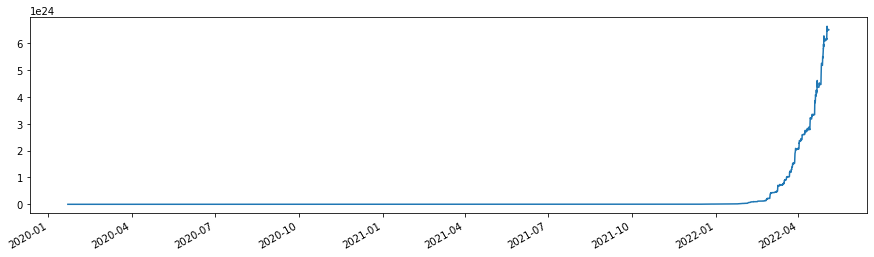

In [42]:
df['cum_str_return'].plot(figsize=(15,4))

## 변동성전략

In [44]:
df = pyupbit.get_ohlcv('KRW-BTC',interval='minute60', count=200)
df

,open,high,low,close,volume,value
2022-04-26 07:00:00,50470000.0,50993000.0,50427000.0,50700000.0,201.560639,1.020826e+10
2022-04-26 08:00:00,50721000.0,50868000.0,50554000.0,50614000.0,145.642488,7.387062e+09
2022-04-26 09:00:00,50614000.0,50950000.0,50547000.0,50801000.0,180.667138,9.168041e+09
2022-04-26 10:00:00,50801000.0,50856000.0,50655000.0,50693000.0,127.499667,6.472850e+09
2022-04-26 11:00:00,50693000.0,50833000.0,50650000.0,50728000.0,92.713104,4.702804e+09
...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09


In [45]:
df['diff'] = df['high']- df['low']

In [46]:
k= 0.6

df['target_price'] = df['open'] + df['diff'].shift()*k

In [47]:
# 오늘의 고가가 target_price를 터치했다면 매수
df['signal'] = df['high'] >= df['target_price']

In [48]:
df['signal'] =df['signal'].astype('int')

In [49]:
# 5일 후의 수익률
df['return5'] = df.close.pct_change(5)

In [52]:
df['str_return'] = df['return5'] * df['signal']

In [53]:
df.dropna(inplace=True)

In [54]:
df['cum_str_return'] = (df['str_return'] +1).cumprod()

In [55]:
df

,open,high,low,close,volume,value,diff,target_price,signal,return5,str_return,cum_str_return
2022-04-26 12:00:00,50728000.0,50894000.0,50728000.0,50761000.0,75.280242,3.825325e+09,166000.0,50837800.0,1,0.001203,0.001203,1.001203
2022-04-26 13:00:00,50761000.0,50895000.0,50754000.0,50871000.0,79.929058,4.063432e+09,141000.0,50860600.0,1,0.005078,0.005078,1.006287
2022-04-26 14:00:00,50872000.0,51118000.0,50791000.0,50848000.0,212.056124,1.080221e+10,327000.0,50956600.0,1,0.000925,0.000925,1.007218
2022-04-26 15:00:00,50848000.0,50898000.0,50757000.0,50829000.0,96.924318,4.924162e+09,141000.0,51044200.0,0,0.002683,0.000000,1.007218
2022-04-26 16:00:00,50829000.0,51080000.0,50761000.0,50972000.0,82.599861,4.208158e+09,319000.0,50913600.0,1,0.004810,0.004810,1.012063
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04 10:00:00,48948000.0,48999000.0,48782000.0,48810000.0,118.994806,5.821656e+09,217000.0,49094400.0,0,-0.003878,-0.000000,1.136875
2022-05-04 11:00:00,48840000.0,48960000.0,48800000.0,48811000.0,109.233073,5.338466e+09,160000.0,48970200.0,0,-0.003064,-0.000000,1.136875
2022-05-04 12:00:00,48825000.0,48951000.0,48790000.0,48892000.0,90.941339,4.445181e+09,161000.0,48921000.0,1,-0.000327,-0.000327,1.136503
2022-05-04 13:00:00,48891000.0,48967000.0,48787000.0,48811000.0,126.290863,6.172321e+09,180000.0,48987600.0,0,0.000697,0.000000,1.136503


<AxesSubplot:>

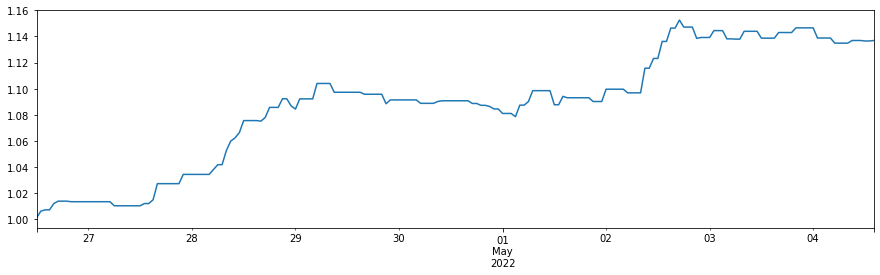

In [57]:
df['cum_str_return'].plot(figsize=(15,4))

## mean_reversion(볼린져밴드)

In [58]:
df= pyupbit.get_ohlcv('KRW-BTC',count=500)
df.head()

,open,high,low,close,volume,value
2020-12-21 09:00:00,25890000.0,26588000.0,24600000.0,25387000.0,13640.523459,3.502190e+11
2020-12-22 09:00:00,25387000.0,26828000.0,24925000.0,26776000.0,7994.073583,2.061332e+11
2020-12-23 09:00:00,26776000.0,27070000.0,25600000.0,26380000.0,12398.447606,3.283046e+11
2020-12-24 09:00:00,26380000.0,26608000.0,25774000.0,26503000.0,6661.237365,1.745703e+11
2020-12-25 09:00:00,26503000.0,27271000.0,26171000.0,27122000.0,7979.827412,2.135000e+11


In [59]:
window = 20
df.loc[:,'sma_20'] = df['close'].rolling(window).mean()

rolling_std = df['close'].rolling(window).std()

df['higher_band'] = df['sma_20'] +rolling_std*1.5
df['lower_band'] = df['sma_20'] -rolling_std*1.5

In [60]:
df

,open,high,low,close,volume,value,sma_20,higher_band,lower_band
2020-12-21 09:00:00,25890000.0,26588000.0,24600000.0,25387000.0,13640.523459,3.502190e+11,NaN,NaN,NaN
2020-12-22 09:00:00,25387000.0,26828000.0,24925000.0,26776000.0,7994.073583,2.061332e+11,NaN,NaN,NaN
2020-12-23 09:00:00,26776000.0,27070000.0,25600000.0,26380000.0,12398.447606,3.283046e+11,NaN,NaN,NaN
2020-12-24 09:00:00,26380000.0,26608000.0,25774000.0,26503000.0,6661.237365,1.745703e+11,NaN,NaN,NaN
2020-12-25 09:00:00,26503000.0,27271000.0,26171000.0,27122000.0,7979.827412,2.135000e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-30 09:00:00,49731000.0,49953000.0,49243000.0,49283000.0,2078.698534,1.032479e+11,50333950.0,5.144996e+07,4.921794e+07
2022-05-01 09:00:00,49283000.0,49620000.0,48500000.0,49383000.0,2882.994540,1.416309e+11,50300600.0,5.145835e+07,4.914285e+07
2022-05-02 09:00:00,49383000.0,50210000.0,49110000.0,49520000.0,2614.563560,1.299316e+11,50247750.0,5.142964e+07,4.906586e+07
2022-05-03 09:00:00,49501000.0,49678000.0,48638000.0,48777000.0,2755.309315,1.356670e+11,50101600.0,5.126465e+07,4.893855e+07


In [61]:
 df.dropna(inplace=True)

<AxesSubplot:>

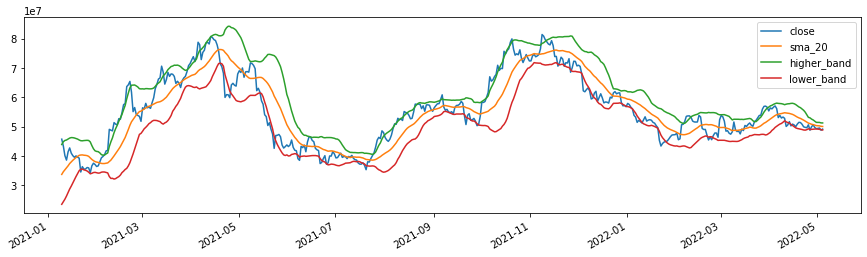

In [62]:
df[['close','sma_20','higher_band','lower_band']].plot(figsize=(15,4))


In [65]:
pos1 = np.where(df['close'] <= df['lower_band'],1,0)
pos2 = np.where(df['close'] >= df['higher_band'],-1,0)
df.loc[:,'position'] = pos1 + pos2

In [66]:
df['rtn_5'] = df.close.pct_change(5)

In [67]:
df['str_rtn'] = df['rtn_5'] * df['position']
df

,open,high,low,close,volume,value,sma_20,higher_band,lower_band,rtn_5,position,str_rtn
2021-01-09 09:00:00,47201000.0,47650000.0,45171000.0,45718000.0,13453.126565,6.256753e+11,33701200.0,4.389376e+07,2.350864e+07,NaN,-1,NaN
2021-01-10 09:00:00,45716000.0,47000000.0,39500000.0,43404000.0,23031.006992,1.017005e+12,34602050.0,4.484553e+07,2.435857e+07,NaN,0,NaN
2021-01-11 09:00:00,43400000.0,43570000.0,35010000.0,40094000.0,50543.882216,1.951978e+12,35267950.0,4.527782e+07,2.525808e+07,NaN,0,NaN
2021-01-12 09:00:00,40094000.0,40888000.0,36654000.0,38577000.0,22472.575758,8.770518e+11,35877800.0,4.543074e+07,2.632486e+07,NaN,0,NaN
2021-01-13 09:00:00,38496000.0,41900000.0,37001000.0,41380000.0,15632.802074,6.091158e+11,36621650.0,4.573897e+07,2.750433e+07,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 09:00:00,49731000.0,49953000.0,49243000.0,49283000.0,2078.698534,1.032479e+11,50333950.0,5.144996e+07,4.921794e+07,-0.026297,0,-0.000000
2022-05-01 09:00:00,49283000.0,49620000.0,48500000.0,49383000.0,2882.994540,1.416309e+11,50300600.0,5.145835e+07,4.914285e+07,0.012424,0,0.000000
2022-05-02 09:00:00,49383000.0,50210000.0,49110000.0,49520000.0,2614.563560,1.299316e+11,50247750.0,5.142964e+07,4.906586e+07,-0.008688,0,-0.000000
2022-05-03 09:00:00,49501000.0,49678000.0,48638000.0,48777000.0,2755.309315,1.356670e+11,50101600.0,5.126465e+07,4.893855e+07,-0.035647,1,-0.035647


In [69]:
df['cum_str_rtn'] = (df['str_rtn']+1).cumprod()
df.head()

,open,high,low,close,volume,value,sma_20,higher_band,lower_band,rtn_5,position,str_rtn,cum_str_rtn
2021-01-09 09:00:00,47201000.0,47650000.0,45171000.0,45718000.0,13453.126565,6.256753e+11,33701200.0,4.389376e+07,2.350864e+07,NaN,-1,NaN,NaN
2021-01-10 09:00:00,45716000.0,47000000.0,39500000.0,43404000.0,23031.006992,1.017005e+12,34602050.0,4.484553e+07,2.435857e+07,NaN,0,NaN,NaN
2021-01-11 09:00:00,43400000.0,43570000.0,35010000.0,40094000.0,50543.882216,1.951978e+12,35267950.0,4.527782e+07,2.525808e+07,NaN,0,NaN,NaN
2021-01-12 09:00:00,40094000.0,40888000.0,36654000.0,38577000.0,22472.575758,8.770518e+11,35877800.0,4.543074e+07,2.632486e+07,NaN,0,NaN,NaN
2021-01-13 09:00:00,38496000.0,41900000.0,37001000.0,41380000.0,15632.802074,6.091158e+11,36621650.0,4.573897e+07,2.750433e+07,NaN,0,NaN,NaN


In [70]:
df.dropna(inplace=True)

<AxesSubplot:>

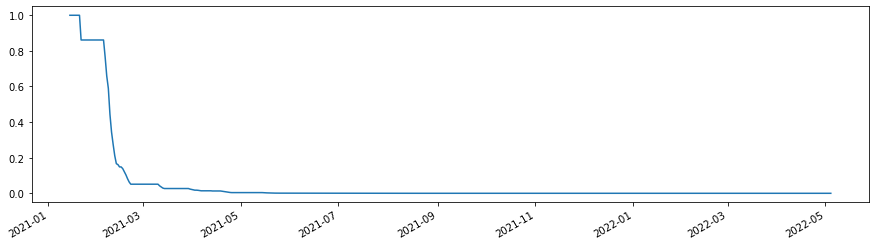

In [72]:
df['cum_str_rtn'].plot(figsize=(15,4))

## momentum(오르는걸 사자)

In [78]:
df= pyupbit.get_ohlcv('KRW-BTC',count=500)
df.head()

,open,high,low,close,volume,value
2020-12-21 09:00:00,25890000.0,26588000.0,24600000.0,25387000.0,13640.523459,3.502190e+11
2020-12-22 09:00:00,25387000.0,26828000.0,24925000.0,26776000.0,7994.073583,2.061332e+11
2020-12-23 09:00:00,26776000.0,27070000.0,25600000.0,26380000.0,12398.447606,3.283046e+11
2020-12-24 09:00:00,26380000.0,26608000.0,25774000.0,26503000.0,6661.237365,1.745703e+11
2020-12-25 09:00:00,26503000.0,27271000.0,26171000.0,27122000.0,7979.827412,2.135000e+11


In [83]:
df['rtn_5'] = df.close.pct_change(5)

In [79]:
momentum_window = 20
target_return = 0.05

df['rtn_20'] = df.close.pct_change(momentum_window)

df['position'] = np.where(df['rtn_20']> target_return,1,0)

In [80]:
df.dropna(inplace= True)

In [81]:
df

,open,high,low,close,volume,value,rtn_20,position
2021-01-10 09:00:00,45716000.0,47000000.0,39500000.0,43404000.0,23031.006992,1.017005e+12,0.709694,1
2021-01-11 09:00:00,43400000.0,43570000.0,35010000.0,40094000.0,50543.882216,1.951978e+12,0.497386,1
2021-01-12 09:00:00,40094000.0,40888000.0,36654000.0,38577000.0,22472.575758,8.770518e+11,0.462358,1
2021-01-13 09:00:00,38496000.0,41900000.0,37001000.0,41380000.0,15632.802074,6.091158e+11,0.561333,1
2021-01-14 09:00:00,41380000.0,43998000.0,40510000.0,42735000.0,15952.888927,6.754529e+11,0.575658,1
...,...,...,...,...,...,...,...,...
2022-04-30 09:00:00,49731000.0,49953000.0,49243000.0,49283000.0,2078.698534,1.032479e+11,-0.066946,0
2022-05-01 09:00:00,49283000.0,49620000.0,48500000.0,49383000.0,2882.994540,1.416309e+11,-0.013327,0
2022-05-02 09:00:00,49383000.0,50210000.0,49110000.0,49520000.0,2614.563560,1.299316e+11,-0.020899,0
2022-05-03 09:00:00,49501000.0,49678000.0,48638000.0,48777000.0,2755.309315,1.356670e+11,-0.056538,0


In [84]:
df['str_rtn'] = df['position'] * df['rtn_5']
df['cum_str_rtn'] = (df['str_rtn']+1).cumprod()

<AxesSubplot:>

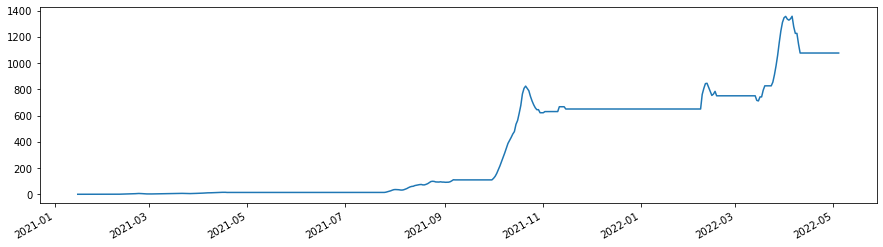

In [85]:
df['cum_str_rtn'].plot(figsize=(15,4))